# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

- **What can be said about the three outliers in the upper left corner of the graph? Is their first principal component score high or low?  What about their second principal component score?**

The three outliers have low PC1 scores, below 0, but high PC2 scores, above 1 and even approaching 2. Since PC1 captures the most variance in the data, these outliers don’t align with the main trend. Instead, they stand out in PC2, which captures meaningful variation but explains less variance overall. The high PC2 scores mean that the outliers are strongly tied to whatever PC2 is measuring and may represent a separate behavior or pattern worth exploring in more detail.

- **What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that? How are series_1 and series_2 related, according to how they were created?**

Series_1 and series_2 are highly correlated because series_2 is created by multiplying series_1 with random points with a small spread (scale = 0.1). This keeps series_2 values close to series_1, which is why most of the data points align along a diagonal trend overall. Series_3 is the same as series_2, but with a wider spread (scale = 0.5), so the values deviate more from series_1. This added variation causes the dots to spread out more and break away from the main trend. Because of that, series_3 shows less correlation and contributes different patterns to the data. It's harder to say much about the relationship between series_1 and series_2 because they're too close to each other. On the other hand, series_3 adds more value to the analysis because it’s more spread out, which could reveal new patterns in the data.

- **Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?**

The advantage of this graph is that it gives a clear view of how the data is spread and grouped. The main pattern is clear at a glance - most points follow a diagonal line, which makes sense given how Series_1 and Series_2 were created. What’s more interesting is the group of outliers in the top left corner. They stand out right away and need a more closer review. The downside is that the graph shows general trends and outliers, not the exact values of series_1, series_2, or series_3, so the original data can't be read directly from it.

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

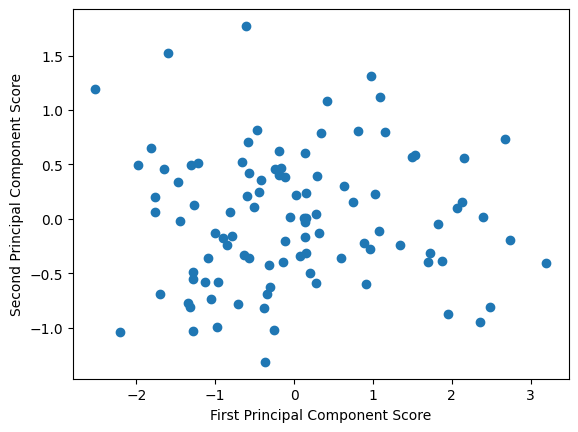

In [51]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:

Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.



In [52]:
import seaborn as sns

# Loading data
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")
claims_df = pd.read_csv("insurance_claims.csv") 

In [53]:
# Show dataset features
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [54]:
# Show dataset features
claims_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### **Heatmaps**



### 1. Vehicle Insurance Fraud Detection Dataset


The heatmap offers an opportunity to expand on the findings described in Milestone 3. As the most practical feature in the dataset, FraudFound was converted into numerical form (0 and 1) to help identify patterns in RepNumber (the representative handling the claim) and DayOfWeekClaimed (when the claim was filed). Here are the key observations shown in the heatmap:

- Previously, it was found that Reps 6, 7, and 10 handled a large number of fraudulent claims (Week 6, Cell: 45). This could be due to factors like a higher claim volume, a heavier workload, or potential gaps in fraud detection training. Now, the heatmap reveals that Rep 13 shows a 50% fraud rate on Saturdays, far exceeding the others. This stands out even more considering Rep 13 dealt with fewer claims overall compared to Reps 6, 7, and 10. The dataset-wide fraud rate was around 5.99%, making Rep 13 a clear outlier.

- Most of the fraudulent claims appear to fall on weekends. The heatmap shows noticeable spikes for several reps, especially Reps 1, 3, 9, 10, 12, and 13. The reason for this weekend trend isn’t clear, but the pattern is too strong to ignore. Rep 10, for example, had a Saturday spike of 17%, which might not seem extreme at first glance, but is worth flagging given the dataset-wide fraud rate.

- Another important insight, which would not be obvious without this heatmap, is the fraud rate for Rep 12. In earlier analysis (in Week 6), Rep 12 had the lowest number of fraudulent claims, well below the 5.99% average. However, the heatmap demonstrates that the fraudulent claims Rep 12 encountered were concentrated on Sundays, reaching 33%!

**Conclusion:**

Weekend claim filings show a suspicious trend across multiple representatives, suggesting that claims filed on Saturdays and Sundays may warrant closer investigation. While it’s true that claims can be reviewed later during the week, the consistent weekend spike across many representative may lead to the suspicion that fraudsters intentionally time claim submissions to exploit reduced scrutiny at intake or delayed processing. Reps 6, 7, and 10 remain high-risk overall, and Rep 13 should now be included due to a sharp spike in weekend fraud. Rep 12, previously low-risk, shows hidden vulnerability on Sundays, which warrants further investigation.

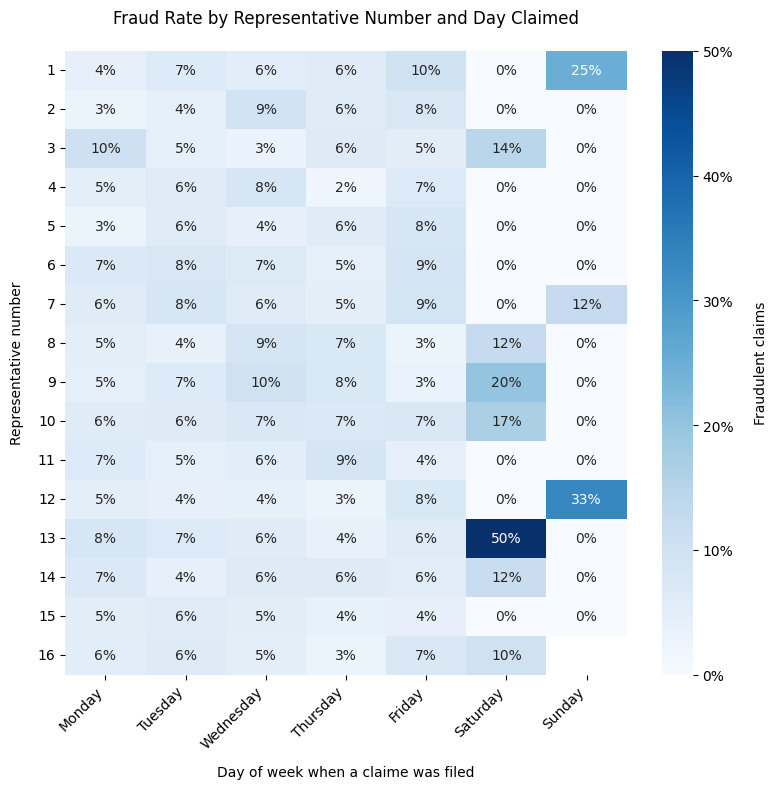

In [55]:
from matplotlib.ticker import FuncFormatter

# Map fraud flag
fraud_df['FraudFoundFlag'] = fraud_df['FraudFound'].map({'Yes': 1, 'No': 0})

# Pivot and reorder days
pivot = fraud_df.pivot_table(
    index='RepNumber',
    columns='DayOfWeekClaimed',
    values='FraudFoundFlag',
    aggfunc='mean'
)

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot[day_order]
pivot.index.name = None

# Plot
plt.figure(figsize=(8, 8))
ax = sns.heatmap(pivot, cmap="Blues", annot=True, fmt=".0%", cbar_kws={'label': 'Fraudulent claims'})

# Set title and labels
plt.title("Fraud Rate by Representative Number and Day Claimed", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.xlabel("Day of week when a claime was filed", labelpad=10)
plt.ylabel("Representative number", labelpad=10)

# Format colorbar ticks as percentages
colorbar = ax.collections[0].colorbar
colorbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x * 100)}%"))
colorbar.set_label("Fraudulent claims", labelpad=15)

plt.tight_layout()
plt.show()

### 2. Insurance Claims Dataset



As with the previous dataset, the following heatmaps help expand and confirm the findings from Milestone 3. The choice of creating two heatmaps instead of one stemmed from the need to check the distribution of all claims vs. fraudulent claims. Unsurprisingly, the increase in overall claims led to the spike in fraudulent claims, but the correlation did not work in all cases. Here are the key observations:

- The first heatmap confirms that most claims (both fraudulent and non-fraudulent) tend to fall into the 40k-80k range, but there was a concentration of claims under $20K for overall claims (large number of claims from 3 to 9 AM). Fraudulent claims are noticeably concentrated between 3 AM and 8 AM for the 60k-80k range, but not for smaller claims. In the initial analysis (Week 6, Cell: 62), the scatterplot showed the concentration of fraudulents in the lowest bin, but in absolute numbers this does not appear to be that critical. This also reinforces the earlier finding that fraud tends to occur during off-peak hours but now with clearer patterns by claim amount, which is the benefit of using the heatmap.

- While some high-value claims (80k-100k) appear in both charts, their frequency is relatively low. This might mean high-value claims are reviewed more carefully, or that fraudsters avoid filing at those levels to reduce suspicion.

- Hour 16 (4 PM) stands out as an anomaly: it shows the highest single fraud count (11) in the 60k-80k range. This may be a processing hour, or possibly tied to internal cutoff times for filing.

**Conclusion:** 

Fraud is most concentrated in the 60k-80k claim range during early morning hours (3-8 AM), reinforcing earlier findings that fraudsters may target off-peak times to avoid scrutiny. Hour 16 (4 PM) emerges as a surprising spike, possibly tied to internal processing. These insights suggest that fraud isn’t random: it clusters in “safe zones” that balance profitability and believability, helping refine when and where to prioritize audits of claims.

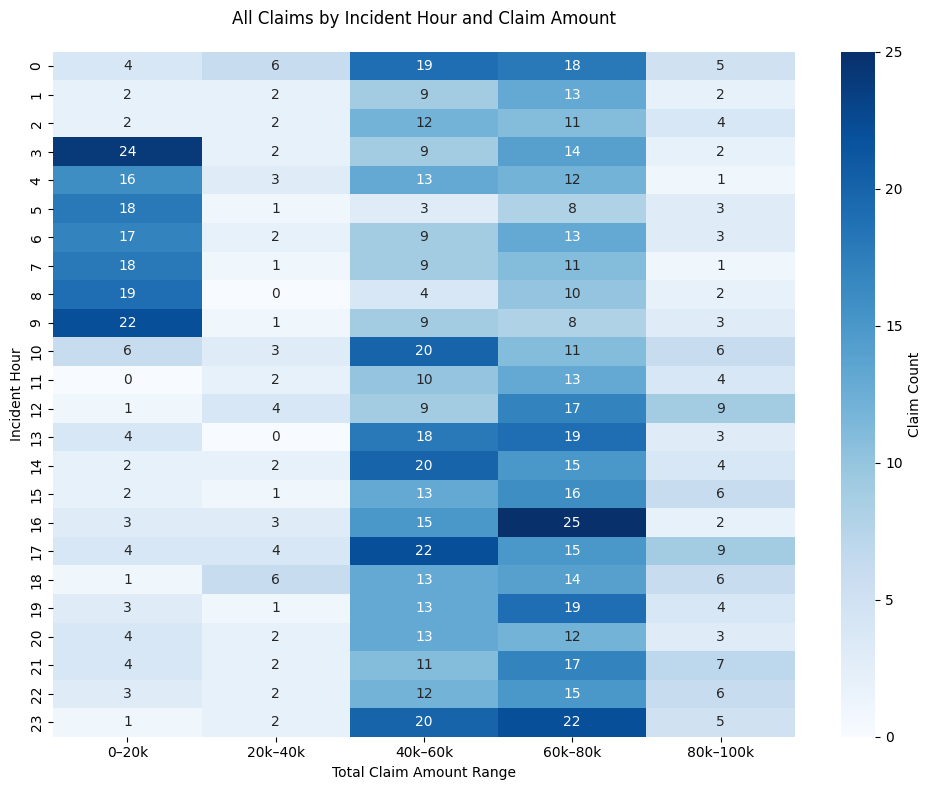

In [56]:
# Bin total_claim_amount
bins = [0, 20000, 40000, 60000, 80000, 100000]
labels = ['0–20k', '20k–40k', '40k–60k', '60k–80k', '80k–100k']
claims_df['claim_bin'] = pd.cut(claims_df['total_claim_amount'], bins=bins, labels=labels, right=False)

# Pivot table for all claims
pivot_all = claims_df.pivot_table(
    index='incident_hour_of_the_day',
    columns='claim_bin',
    values='fraud_reported',
    aggfunc='count',
    observed=False
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_all, cmap="Blues", annot=True, fmt="d", cbar_kws={'label': 'Claim Count'})
plt.title("All Claims by Incident Hour and Claim Amount", pad=20)
plt.ylabel("Incident Hour")
plt.xlabel("Total Claim Amount Range")
plt.tight_layout()
plt.show()

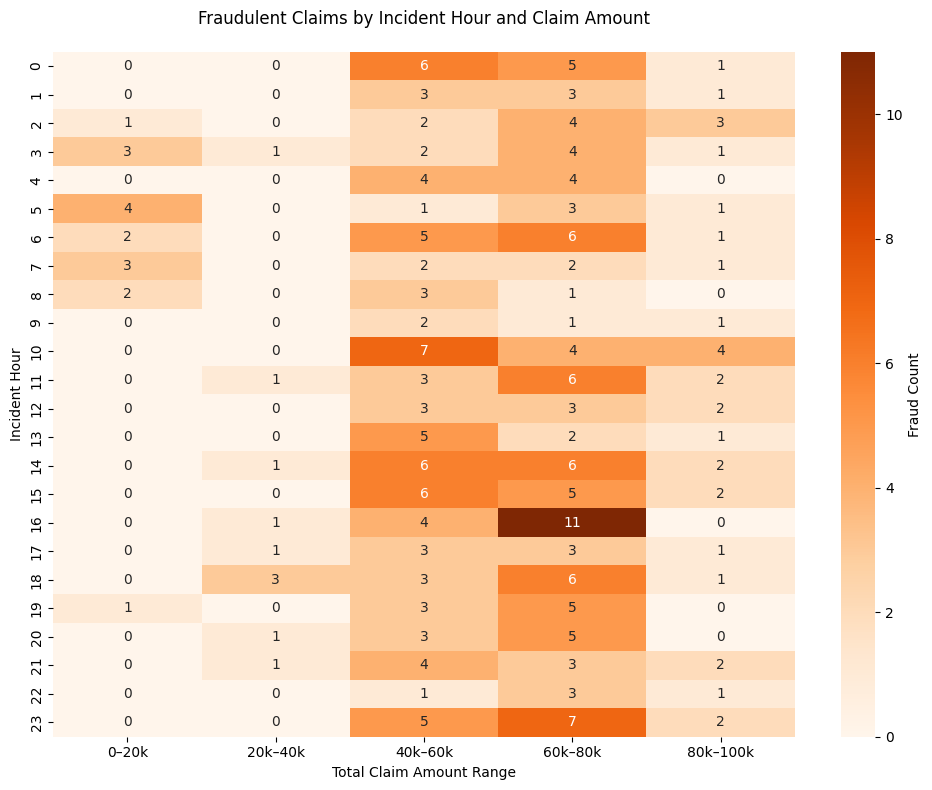

In [57]:
# Filter for fraudulent claims
fraud_only = claims_df[claims_df['fraud_reported'] == "Y"]

# Bin total_claim_amount
bins = [0, 20000, 40000, 60000, 80000, 100000]
labels = ['0–20k', '20k–40k', '40k–60k', '60k–80k', '80k–100k']
claims_df['claim_bin'] = pd.cut(claims_df['total_claim_amount'], bins=bins, labels=labels, right=False)

# Pivot table for fraudulent claims
pivot_fraud = fraud_only.pivot_table(
    index='incident_hour_of_the_day',
    columns='claim_bin',
    values='fraud_reported',
    aggfunc='count',
    observed=False
)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_fraud, cmap="Oranges", annot=True, fmt="d", cbar_kws={'label': 'Fraud Count'})
plt.title("Fraudulent Claims by Incident Hour and Claim Amount", pad=20)
plt.ylabel("Incident Hour")
plt.xlabel("Total Claim Amount Range")
plt.tight_layout()
plt.show()

### **Bubble plots**



### 1. Vehicle Insurance Fraud Detection Dataset

In Week 4 (Cell: 132), a histogram was used to group customers by age and show how non-fraudulent and fraudulent claims were distributed. It was helpful for a quick scan and helped surface the Age=0 group, a clear outlier that had a fraud rate of 9.69%, well above the dataset average of 5.99%. But the bubble plot provides a better view of how fraud rates change across the age spectrum, with the fraud rate now shown directly on the y-axis. Several observations stand out from this plot:

- The Age = 0 outlier is confirmed, sitting at around 10% fraud rate. Most other age groups fall between 2.5%-7.5%, with a slight downward trend in fraud rate as age increases, reflecting both behavior and the demographic skew toward middle-aged claimants.

- Compared to the previous histogram, the bubble plot does a better job of revealing other outliers that weren’t as visible before. Ages 18-25 have fewer claims overall but higher fraud rates, which are just under 20 exceed 15%, while those under 25 hover near 10%.

- The upper right portion of the graph is another important insight: not all fraud spikes come from young claimants. The 65-72 age group shows 4 dots clustered around 12-13%, revealing another high-risk demographic that wasn’t as visible in the histogram. Interestingly, fraud drops off sharply beyond age 72, where claim volume is low but fraud rates dip near 0% - a potential behavioral or systemic cutoff.

- Between ages 30-45, where claim volume is highest, fraud rates are relatively stable and moderate, indicating that this group poses less risk despite filing more frequently.

**Conclusion:**

The bubble plot not only reinforces known outliers but reveals hidden risk zones in both younger and older groups. It also helps detect where high claim volume correlates with moderate fraud risk (the 30-50 age group). Overall, this visualization sharpens the understanding of age-based fraud behavior and helps target high-risk clusters more precisely.

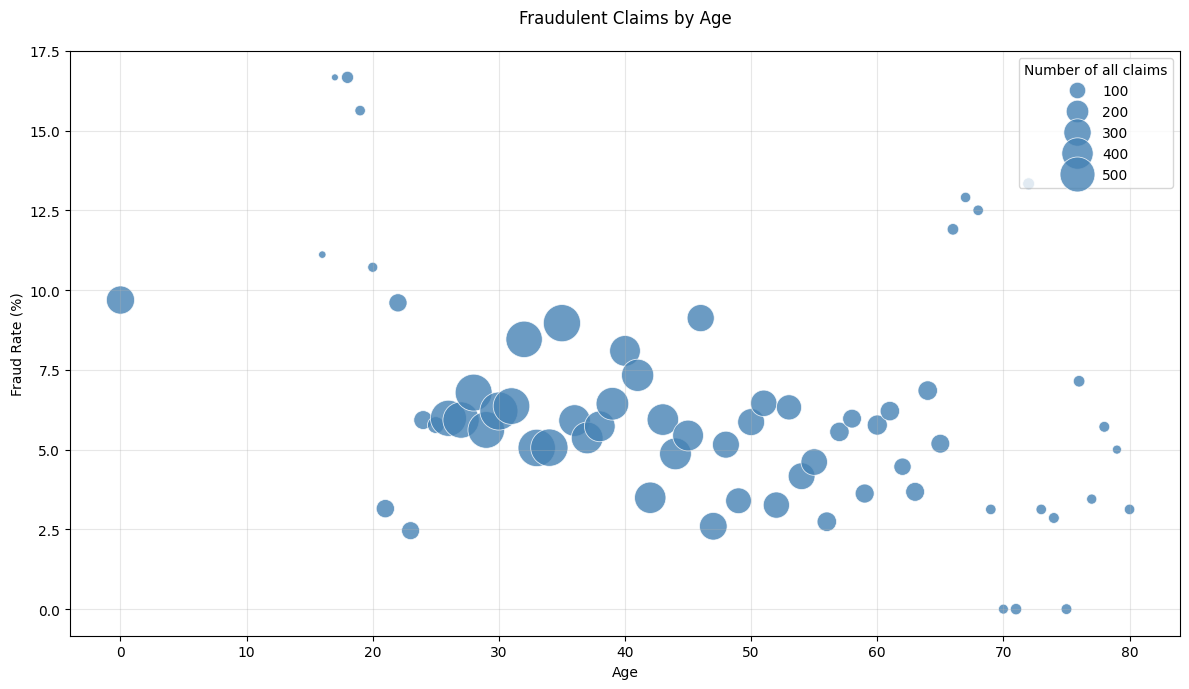

In [58]:
# Map fraud flag
fraud_df['FraudFoundFlag'] = fraud_df['FraudFound'].map({'Yes': 1, 'No': 0})

# Group by Age and calculate fraud rate + count
age_summary = fraud_df.groupby('Age').agg(
    fraud_rate=('FraudFoundFlag', 'mean'),
    count=('FraudFoundFlag', 'size')
).reset_index()

# Plot with fraud rate as percentage
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=age_summary,
    x='Age',
    y=age_summary['fraud_rate'] * 100, 
    size='count',
    sizes=(25, 750),
    color='steelblue',
    alpha=0.8,
    legend='brief'
)

plt.title("Fraudulent Claims by Age", pad=20)
plt.xlabel("Age")
plt.ylabel("Fraud Rate (%)")
plt.legend(title='Number of all claims', loc='upper right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Insurance Claims Dataset

In Week 4 (Cell: 155), a histogram was used to group customers by age and show how non-fraudulent and fraudulent claims were distributed. It was helpful for a quick scan, and worked well during the analysis of the Vehicle Insurance Fraud Detection dataset. However, unlike the first dataset, Age in this dataset appears to be less informative, which became clear after running the bubble plot. Several observations noted in this plot:

- The dataset shows a much higher rate of fraudulent claims overall compared to the previous one. That alone raises questions about how fraud is defined and flagged in this dataset, how reliable the labeling is, and whether the fraud detection criteria differ. The average fraud rate in this dataset ranges between 15% and just under 40%, which is unusually high.

- The largest bubbles (the most claims overall) cluster between ages 30 and 45. Fraud rates in this range are relatively stable, typically between 15% and just under 40%. This range seems to represent the bulk of claimants and offers more reliability for interpreting the data.

- Fraudulent claims are spread across all age groups without a clear trend. In contrast to the previous dataset where younger and older age groups stood out, this dataset is smaller, which affects the shape and stability of both the x- and y-axes. That said, there’s still a visible concentration of higher fraud rates among customers aged 50 to 60. Even though they make up a smaller share of total claims, the fraud rate for this group ranges from 40% to 50%, which is notably higher than the population average. This pattern was not visible in the earlier histogram.

- A few sharp spikes in fraud (100%) appear around ages 18 and 22, but the bubbles are very small. These likely come from very small claim counts and may be statistical noise or outliers.

**Conclusion:**

This bubble plot shows that Age is not a strong standalone predictor of fraudulent claims in this dataset. While they are spread across all age groups, the 30–45 range shows the most stable behavior and the highest claim volume. Higher fraud rates among older customers (50-60) raise some red flags, especially given their lower claim volume. The spike at younger ages (18 and 22) looks more like noise than a pattern. Compared to the previous dataset, the overall fraud rate is much higher, which shifts the interpretation, raising questions about data consistency and labeling.

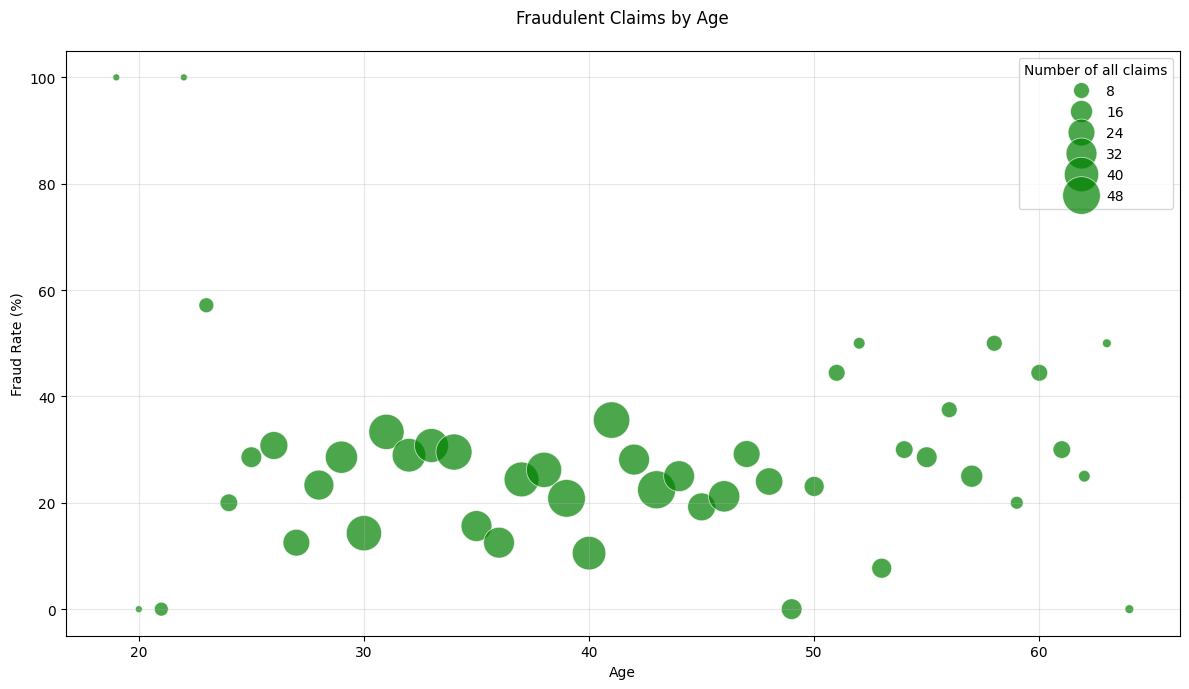

In [59]:
# Map fraud flag
claims_df['FraudReportedFlag'] = claims_df['fraud_reported'].map({'Y': 1, 'N': 0})

# Group by age + count
age_summary = claims_df.groupby('age').agg(
    fraud_rate=('FraudReportedFlag', 'mean'),
    count=('FraudReportedFlag', 'size')
).reset_index()

# # Plot with fraud rate as percentage
plt.figure(figsize=(12, 7))
sns.scatterplot(
    data=age_summary,
    x='age',
    y=age_summary['fraud_rate'] * 100,
    size='count',
    sizes=(25, 750),
    color='green',
    alpha=0.7,
    legend='brief'
)

plt.title("Fraudulent Claims by Age", pad=20)
plt.xlabel("Age")
plt.ylabel("Fraud Rate (%)")
plt.legend(title='Number of all claims', loc='upper right')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **PCA**

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?



### 1. Vehicle Insurance Fraud Detection Dataset

In this PCA analysis, three features were selected: PastNumberOfClaims_clean, NumberOfSuppliments_clean, and DaysPolicyClaim_clean. PastNumberOfClaims was used in the previous weeks but to a limited extent. For example, it was previously found that while data has more 2 to 4 claims (5,191, fraud rate: 5.36%), the fraudulent rate is higher in the first claims (4,013, fraud rate: 7.78%) (Week 6, Cell: 46). Since PastNumberOfClaims provided valuable insight, it was combined with the new two related features to investigate any additional patters. All three features were converted to numerical values first and then used to create principal components capturing how these variables vary across the dataset. Below are the conversion results followed by the observations from PCA:

- PC1 is dominated by NumberOfSuppliments_clean, which has the strongest weight (0.97), while PastNumberOfClaims_clean contributes modestly (0.25) and DaysPolicyClaim_clean is nearly flat (0.01). This component alone explains 61.06% of the total variance, and PC2 adds another 38.57%, showing that nearly all meaningful variation comes from just two features. PC3 contributes virtually nothing (~0.003%), which means that DaysPolicyClaim_clean doesn’t bring much new information.

- The projection formula for PC1 shows that most of the variation happens in the direction of NumberOfSuppliments, confirming that this variable has the most influence. The estimated rows based on PC1 show strong alignment with this finding: the largest shifts in values are seen in the suppl_est column.

**Conclusion:**

PCA confirms that NumberOfSuppliments_clean is the dominant variable among the selected features, contributing most strongly to PC1. While PastNumberOfClaims_clean adds some variation, and DaysPolicyClaim_clean very little, the structure in this trio can largely be explained using the first two principal directions. This simplifies dimensionality significantly without major loss of information.

Before applying PCA, the columns were converted into numerical values. 

In [60]:
fraud_df = pd.read_csv("vehicle_insurance_fraud_detection.csv")

# Map for PastNumberOfClaims
claims_map = {
    'none': 0,
    '1': 1,
    '2 to 4': 2,
    'more than 4': 3
}
fraud_df['PastNumberOfClaims_clean'] = (
    fraud_df['PastNumberOfClaims']
    .astype(str)
    .str.strip()
    .map(claims_map)
)

# Map for NumberOfSuppliments
suppl_map = {
    'none': 0,
    '1 to 2': 1,
    '3 to 5': 2,
    'more than 5': 3
}
fraud_df['NumberOfSuppliments_clean'] = (
    fraud_df['NumberOfSuppliments']
    .astype(str)
    .str.strip()
    .map(suppl_map)
)

# Map for Days:Policy-Claim
policy_map = {
    'none': 0,
    '8 to 15': 1,
    '15 to 30': 2,
    'more than 30': 3
}
fraud_df['DaysPolicyClaim_clean'] = (
    fraud_df['Days:Policy-Claim']
    .astype(str)
    .str.strip()
    .map(policy_map)
)

# Output
print("PastNumberOfClaims_clean:", fraud_df['PastNumberOfClaims_clean'].dropna().unique())
print("NumberOfSuppliments_clean:", fraud_df['NumberOfSuppliments_clean'].dropna().unique())
print("DaysPolicyClaim_clean:", fraud_df['DaysPolicyClaim_clean'].dropna().unique())

PastNumberOfClaims_clean: [0 1 2 3]
NumberOfSuppliments_clean: [0 3 2 1]
DaysPolicyClaim_clean: [3 2 1 0]


In [61]:
from sklearn.decomposition import PCA

# Cleaned columns for PCA 
pca_df = fraud_df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean", "DaysPolicyClaim_clean"]].dropna()

# Mean of each feature (column)
mu_claims, mu_suppl, mu_days = pca_df.mean().values

# Fit PCA
pca = PCA(n_components=3)
pca.fit(pca_df)

# Print component vectors
print(f"Component vectors:\n{pca.components_}")

# Print means
print(f"Means:\nmu_claims = {mu_claims:.2f}, mu_suppl = {mu_suppl:.2f}, mu_days = {mu_days:.2f}")

# Projection formula for PC1
print("\nProjection formula onto PC1:")
print(f"(claims, suppl, days) ≈ ({pca.components_[0][0]:.2f} * (claims - {mu_claims:.2f}) + "
      f"{pca.components_[0][1]:.2f} * (suppl - {mu_suppl:.2f}) + "
      f"{pca.components_[0][2]:.2f} * (days - {mu_days:.2f})) * "
      f"({pca.components_[0][0]:.2f}, {pca.components_[0][1]:.2f}, {pca.components_[0][2]:.2f}) + "
      f"({mu_claims:.2f}, {mu_suppl:.2f}, {mu_days:.2f})")

# Estimate values based on PC1 projection
df_proj = pca_df.copy()
df_proj["v"] = (
    pca.components_[0][0] * (pca_df.iloc[:, 0] - mu_claims) +
    pca.components_[0][1] * (pca_df.iloc[:, 1] - mu_suppl) +
    pca.components_[0][2] * (pca_df.iloc[:, 2] - mu_days)
)
df_proj["claim_est"] = df_proj["v"] * pca.components_[0][0] + mu_claims
df_proj["suppl_est"] = df_proj["v"] * pca.components_[0][1] + mu_suppl
df_proj["days_est"] = df_proj["v"] * pca.components_[0][2] + mu_days

# Show sample
print("\nProjection onto PC1:")
print(df_proj[["v", "claim_est", "suppl_est", "days_est"]].head())

# Print variance
print("\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"PC3: {pca.explained_variance_ratio_[2]:.4f}")

Component vectors:
[[ 0.25441191  0.96708296  0.00501387]
 [ 0.96708957 -0.25442564  0.00231364]
 [-0.00351314 -0.00426024  0.99998475]]
Means:
mu_claims = 1.33, mu_suppl = 1.18, mu_days = 2.99

Projection formula onto PC1:
(claims, suppl, days) ≈ (0.25 * (claims - 1.33) + 0.97 * (suppl - 1.18) + 0.01 * (days - 2.99)) * (0.25, 0.97, 0.01) + (1.33, 1.18, 2.99)

Projection onto PC1:
          v  claim_est  suppl_est  days_est
0 -1.476065   0.958648  -0.252121  2.986049
1 -1.476065   0.958648  -0.252121  2.986049
2 -1.221653   1.023373  -0.006083  2.987325
3  1.679596   1.761486   2.799665  3.001871
4 -1.476065   0.958648  -0.252121  2.986049

Explained variance ratio:
PC1: 0.6106
PC2: 0.3857
PC3: 0.0037


### 2. Insurance Claims Dataset

In this PCA analysis, three financial features were selected: injury_claim, property_claim, and vehicle_claim. These features represent separate parts of total_claim_amount, which was analyzed previously in Weeks 4 and 6. Using PCA is important here because it will allow to see which part drives the most variation. Below are the observations from PCA:

- PC1 is dominated by vehicle_claim, with a component weight of 0.96, while injury_claim and property_claim contribute much less (0.186 each). This translates into high explanatory power: PC1 alone captures 94.71% of the total variance, confirming that variation in vehicle-related claims is the main source of structure in this data.

- The projection formula onto PC1 reinforces this: estimated rows show the biggest shifts in vehicle_est, while injury_est and property_est barely move. So the structure of the dataset is mostly about vehicle claims.

**Conclusion:**

PCA confirms that vehicle_claim is the single dominant variable in this group, controlling almost all the variability in the data. The other two features, injury_claim, property_claim, are secondary and track closely together without adding much new information. This finding suggests that future analysis or modeling should treat vehicle_claim as the main feature in the claim breakdown. Reducing these three into a single component using PCA preserves the structure while simplifying the data.

In [62]:
# Select and clean PCA input columns
pca_df = claims_df[["injury_claim", "property_claim", "vehicle_claim"]].dropna()

# Mean of each feature (column)
mu_injury, mu_property, mu_vehicle = pca_df.mean().values

# Fit PCA
pca = PCA(n_components=3)
pca.fit(pca_df)

# Print component vectors
print("Component vectors:")
print(pca.components_)

# Print means
print(f"\nMeans:\nmu_injury = {mu_injury:.2f}, mu_property = {mu_property:.2f}, mu_vehicle = {mu_vehicle:.2f}")

# Projection formula for PC1
print("\nProjection formula onto PC1:")
print(f"(injury, property, vehicle) ≈ "
      f"({pca.components_[0][0]:.2f} * (injury - {mu_injury:.2f}) + "
      f"{pca.components_[0][1]:.2f} * (property - {mu_property:.2f}) + "
      f"{pca.components_[0][2]:.2f} * (vehicle - {mu_vehicle:.2f})) * "
      f"({pca.components_[0][0]:.2f}, {pca.components_[0][1]:.2f}, {pca.components_[0][2]:.2f}) + "
      f"({mu_injury:.2f}, {mu_property:.2f}, {mu_vehicle:.2f})")

# Estimate values based on PC1 projection
df_proj = pca_df.copy()
df_proj["v"] = (
    pca.components_[0][0] * (pca_df["injury_claim"] - mu_injury) +
    pca.components_[0][1] * (pca_df["property_claim"] - mu_property) +
    pca.components_[0][2] * (pca_df["vehicle_claim"] - mu_vehicle)
)
df_proj["injury_est"] = df_proj["v"] * pca.components_[0][0] + mu_injury
df_proj["property_est"] = df_proj["v"] * pca.components_[0][1] + mu_property
df_proj["vehicle_est"] = df_proj["v"] * pca.components_[0][2] + mu_vehicle

# Show sample
print("\nProjection onto PC1:")
print(df_proj[["v", "injury_est", "property_est", "vehicle_est"]].head())

# Print variance
print("\nExplained variance ratio:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"PC3: {pca.explained_variance_ratio_[2]:.4f}")

Component vectors:
[[ 0.18616658  0.18607981  0.96473639]
 [ 0.85760164  0.44836236 -0.25197344]
 [-0.47943866  0.87426855 -0.07611226]]

Means:
mu_injury = 7433.42, mu_property = 7399.57, mu_vehicle = 37928.95

Projection formula onto PC1:
(injury, property, vehicle) ≈ (0.19 * (injury - 7433.42) + 0.19 * (property - 7399.57) + 0.96 * (vehicle - 37928.95)) * (0.19, 0.19, 0.96) + (7433.42, 7399.57, 37928.95)

Projection onto PC1:
              v    injury_est  property_est   vehicle_est
0  14525.971536  10137.670428  10102.559967  51942.683404
1 -35675.626463    791.810665    761.056345   3511.374760
2 -14916.902766   4656.391242   4623.835625  23538.071011
3  11939.268616   9656.112795   9621.226789  49447.196956
4 -34599.684367    992.115125    961.267441   4549.375258

Explained variance ratio:
PC1: 0.9471
PC2: 0.0277
PC3: 0.0252


### **Linear regression analysis using different sets of features.**  

Which features seem most likely to be useful to predict other features?

### 1. Vehicle Insurance Fraud Detection Dataset

As in the PCA above, the same three features, PastNumberOfClaims, NumberOfSuppliments, and DaysPolicyClaim (trio), are used for linear regression. The PCA showed that PC1 (driven mainly by NumberOfSuppliments) accounted for most of the variance in the data, PC2 explained some varianace, and PC3 added very little value to the variance explanation. This linear regression focuses on finding whether these features combined still have a valuable insight.

The first code block runs linear regression to check how well each of the trio can be predicted from the other two. The second block uses all three to try predicting fraud (FraudFoundFlag), which is the main focus of the analysis. The blocks after that included additional individual features (WeekOfMonth and DayOfWeekClaimed, and Age) to test whether there's any linear pattern in predicting fraudulent claims, even though the fraud label is binary.

A few observations from the linear regression results:

- Low correlations (0.1189 for PastNumberOfClaims, 0.1252 for NumberOfSuppliments, and 0.0684 for DaysPolicyClaim) show that the three features do not have strong linear relationships with one another. While the MSE for DaysPolicyClaim appears small (0.0096), this is due to its limited range, not predictive strength. In contrast, PastNumberOfClaims and NumberOfSuppliments show a high MSE, 1.03 and 1.54, demonstrating they cannot be reliably estimated from the other two. Together, these results suggest that the trio lacks meaningful internal structure and does not support regression-based modeling.

- In predicting fraud, the trio, the top two features (NumberOfSuppliments and PastNumberOfClaims), and even NumberOfSuppliments alone produced nearly identical results: MSEs of 0.0560, 0.0560, and 0.0562, and correlations of 0.0648, 0.0635, and 0.0321, respectively. The obvious low correlations, despite the reduced MSE, indicate that these features, even in different combinations, do not provide strong predictive power for fraudulent claims. Thus, linear relationships alone are insufficient for detecting fraudulent claims in this dataset. 

- Since the trio is not useful, additional numeric features were tested, such as WeekOfMonth, DayOfWeekClaimed, and then Age, to see if there was any potential for linear regression. However, none of the tests provided strong predictive value for detecting fraudulent claims.

- WeekOfMonth and DayOfWeekClaimed produced an MSE of 0.0562 and a correlation of 0.0219. While the error was low, the correlation was extremely weak.

- Age gave a similar low MSE (0.0562) with no meaningful correlation (0.0297). This result wasn’t surprising because fraud doesn't follow a single pattern. Still, the test worked as a sanity check to show that an obvious demographic feature is not predictive.

**Conclusion:** 

Linear regression was not effective for analyzing this dataset. The features tested, including the trio (PastNumberOfClaims, NumberOfSuppliments, DaysPolicyClaim), time-related variables, and Age, showed weak correlations and did not provide meaningful predictions of either other features or fraudulent claims. This confirms that fraudulent behavior in this dataset cannot be captured by simple linear relationships.

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
df = fraud_df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean", "DaysPolicyClaim_clean"]].dropna()

# 1. Predict PastNumberOfClaims
lr1 = LinearRegression()
lr1.fit(df[["NumberOfSuppliments_clean", "DaysPolicyClaim_clean"]], df["PastNumberOfClaims_clean"])
pred1 = lr1.predict(df[["NumberOfSuppliments_clean", "DaysPolicyClaim_clean"]])
mse1 = mean_squared_error(df["PastNumberOfClaims_clean"], pred1)
corr1 = np.corrcoef(pred1, df["PastNumberOfClaims_clean"])[0, 1]

# 2. Predict NumberOfSuppliments
lr2 = LinearRegression()
lr2.fit(df[["PastNumberOfClaims_clean", "DaysPolicyClaim_clean"]], df["NumberOfSuppliments_clean"])
pred2 = lr2.predict(df[["PastNumberOfClaims_clean", "DaysPolicyClaim_clean"]])
mse2 = mean_squared_error(df["NumberOfSuppliments_clean"], pred2)
corr2 = np.corrcoef(pred2, df["NumberOfSuppliments_clean"])[0, 1]

# 3. Predict DaysPolicyClaim
lr3 = LinearRegression()
lr3.fit(df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean"]], df["DaysPolicyClaim_clean"])
pred3 = lr3.predict(df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean"]])
mse3 = mean_squared_error(df["DaysPolicyClaim_clean"], pred3)
corr3 = np.corrcoef(pred3, df["DaysPolicyClaim_clean"])[0, 1]

# Output
print(f"Predicting PastNumberOfClaims: MSE = {mse1:.4f}, Correlation = {corr1:.4f}")
print(f"Predicting NumberOfSuppliments: MSE = {mse2:.4f}, Correlation = {corr2:.4f}")
print(f"Predicting DaysPolicyClaim: MSE = {mse3:.4f}, Correlation = {corr3:.4f}")

Predicting PastNumberOfClaims: MSE = 1.0329, Correlation = 0.1189
Predicting NumberOfSuppliments: MSE = 1.5357, Correlation = 0.1252
Predicting DaysPolicyClaim: MSE = 0.0096, Correlation = 0.0684


In [64]:
# Map fraud flag
fraud_df['FraudFoundFlag'] = fraud_df['FraudFound'].map({'Yes': 1, 'No': 0})

# Use cleaned data
df = fraud_df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean", "DaysPolicyClaim_clean", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean", "DaysPolicyClaim_clean"]], df["FraudFoundFlag"])
preds = lr.predict(df[["PastNumberOfClaims_clean", "NumberOfSuppliments_clean", "DaysPolicyClaim_clean"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print(f"PastNumberOfClaims, NumberOfSuppliments, DaysPolicyClaim for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

PastNumberOfClaims, NumberOfSuppliments, DaysPolicyClaim for predicting fraudulent claims:
MSE = 0.0560
Correlation = 0.0648


In [65]:
# Map fraud flag
fraud_df['FraudFoundFlag'] = fraud_df['FraudFound'].map({'Yes': 1, 'No': 0})

# Use cleaned data
df = fraud_df[["NumberOfSuppliments_clean", "PastNumberOfClaims_clean", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["NumberOfSuppliments_clean", "PastNumberOfClaims_clean"]], df["FraudFoundFlag"])
preds = lr.predict(df[["NumberOfSuppliments_clean", "PastNumberOfClaims_clean"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print(f"NumberOfSuppliments_clean and PastNumberOfClaims_clean for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

NumberOfSuppliments_clean and PastNumberOfClaims_clean for predicting fraudulent claims:
MSE = 0.0560
Correlation = 0.0635


In [66]:
# Map fraud flag
fraud_df['FraudFoundFlag'] = fraud_df['FraudFound'].map({'Yes': 1, 'No': 0})

# Use cleaned data
df = fraud_df[["NumberOfSuppliments_clean", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["NumberOfSuppliments_clean"]], df["FraudFoundFlag"])
preds = lr.predict(df[["NumberOfSuppliments_clean"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print(f"NumberOfSuppliments for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

NumberOfSuppliments for predicting fraudulent claims:
MSE = 0.0562
Correlation = 0.0321


In [67]:
# Map fraud labels
fraud_df['FraudFoundFlag'] = fraud_df['FraudFound'].map({'Yes': 1, 'No': 0})

# Encode DayOfWeekClaimed
df = pd.get_dummies(fraud_df[['WeekOfMonth', 'DayOfWeekClaimed', 'FraudFoundFlag']], drop_first=True)

# Prepare inputs and target
X = df.drop('FraudFoundFlag', axis=1)
y = df['FraudFoundFlag']

# Fit model
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

# Evaluate
mse = mean_squared_error(y, preds)
corr = np.corrcoef(preds, y)[0, 1]

print(f"WeekOfMonth and DayOfWeekClaimed for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

WeekOfMonth and DayOfWeekClaimed for predicting fraudulent claims:
MSE = 0.0562
Correlation = 0.0219


In [68]:
# Prepare input and target
df_age = fraud_df[['Age', 'FraudFoundFlag']].dropna()
X = df_age[['Age']]
y = df_age['FraudFoundFlag']

# Fit model
lr = LinearRegression()
lr.fit(X, y)
preds = lr.predict(X)

# Evaluate
mse = mean_squared_error(y, preds)
corr = np.corrcoef(preds, y)[0, 1]

print(f"Age for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

Age for predicting fraudulent claims:
MSE = 0.0562
Correlation = 0.0297


### 2. Insurance Claims Dataset

As in the PCA, the same three features, vehicle_claim, injury_claim, and property_claim, were used for linear regression. The PCA showed that PC1 (driven almost entirely by vehicle_claim) accounted for 94.71% of the variance. This linear regression tests whether the features can predict each other and, more importantly, whether they help identify fraudulent claims.

The first block runs linear regression to see how well each of the three can be predicted from the other two. The second block uses all three features to predict fraud_reported, the main focus of the analysis. The blocks after that included additional individual features (age and policy_annual_premium) to test whether there's any linear pattern in predicting fraudulent claims, even though the fraud label is binary.

A few observations from the linear regression results:

- High correlations (especially 0.82 for vehicle_claim) suggest the three features are strongly linearly related, which indicates they move together and can estimate each other with reasonable accuracy despite large MSE values due to the high scale of the data (in the thousands to tens of thousands). This matches the PCA result, where vehicle_claim dominated the structure of the data. 

- However, this strong internal structure does not translate into useful fraud detection. When using all three features to predict fraud_reported, the correlation dropped to just 0.1777, and the MSE was low only because the target is binary.

- Using vehicle_claim alone led to a nearly identical result: correlation = 0.1700, MSE = 0.1806, confirming that the other two features add little value, which is expected.

- Age showed MSE of 0.1860, which is low because fraud_reported is binary (0 or 1), not because the model is doing well. The correlation of 0.0121 was extremely weak due to no real linear relationship between age and fraudulent claims here. This aligns with the findings from the previous dataset. 

- Policy_annual_premium also failed to predict fraud: the correlation was just 0.0145, and MSE remained at 0.1860. No meaningful linear pattern was found here either.

**Conclusion:**

While the claim components are strongly correlated and structurally redundant, they don’t offer meaningful predictive power for fraud detection. Linear regression confirms what the PCA implied ealier: the dataset can be simplified, but that simplification doesn’t help uncover fraudulent claims. 


In [69]:
# Prepare the data
df = claims_df[["vehicle_claim", "injury_claim", "property_claim"]].dropna()

# 1. Predict vehicle_claim
lr1 = LinearRegression()
lr1.fit(df[["injury_claim", "property_claim"]], df["vehicle_claim"])
pred1 = lr1.predict(df[["injury_claim", "property_claim"]])
mse1 = mean_squared_error(df["vehicle_claim"], pred1)
corr1 = np.corrcoef(pred1, df["vehicle_claim"])[0, 1]

# 2. Predict injury_claim
lr2 = LinearRegression()
lr2.fit(df[["vehicle_claim", "property_claim"]], df["injury_claim"])
pred2 = lr2.predict(df[["vehicle_claim", "property_claim"]])
mse2 = mean_squared_error(df["injury_claim"], pred2)
corr2 = np.corrcoef(pred2, df["injury_claim"])[0, 1]

# 3. Predict property_claim
lr3 = LinearRegression()
lr3.fit(df[["vehicle_claim", "injury_claim"]], df["property_claim"])
pred3 = lr3.predict(df[["vehicle_claim", "injury_claim"]])
mse3 = mean_squared_error(df["property_claim"], pred3)
corr3 = np.corrcoef(pred3, df["property_claim"])[0, 1]

# Output
print(f"Predicting vehicle_claim: MSE = {mse1:.4f}, Correlation = {corr1:.4f}")
print(f"Predicting injury_claim: MSE = {mse2:.4f}, Correlation = {corr2:.4f}")
print(f"Predicting property_claim: MSE = {mse3:.4f}, Correlation = {corr3:.4f}")

Predicting vehicle_claim: MSE = 115123031.3354, Correlation = 0.8228
Predicting injury_claim: MSE = 11301598.3710, Correlation = 0.7247
Predicting property_claim: MSE = 10732717.7269, Correlation = 0.7338


In [70]:
# Map fraud flag
claims_df['FraudFoundFlag'] = claims_df['fraud_reported'].map({'Y': 1, 'N': 0})

# Prepare the data
df = claims_df[["vehicle_claim", "injury_claim", "property_claim", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["vehicle_claim", "injury_claim", "property_claim"]], df["FraudFoundFlag"])
preds = lr.predict(df[["vehicle_claim", "injury_claim", "property_claim"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print("vehicle_claim, injury_claim, property_claim for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

vehicle_claim, injury_claim, property_claim for predicting fraudulent claims:
MSE = 0.1801
Correlation = 0.1777


In [71]:
# Map fraud flag
claims_df['FraudFoundFlag'] = claims_df['fraud_reported'].map({'Y': 1, 'N': 0})

# Prepare the data
df = claims_df[["vehicle_claim", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["vehicle_claim"]], df["FraudFoundFlag"])
preds = lr.predict(df[["vehicle_claim"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print("vehicle_claim for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

vehicle_claim for predicting fraudulent claims:
MSE = 0.1806
Correlation = 0.1700


In [72]:
# Map fraud flag
claims_df['FraudFoundFlag'] = claims_df['fraud_reported'].map({'Y': 1, 'N': 0})

# Prepare the data
df = claims_df[["age", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["age"]], df["FraudFoundFlag"])
preds = lr.predict(df[["age"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print("Age for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

Age for predicting fraudulent claims:
MSE = 0.1860
Correlation = 0.0121


In [73]:
# Map fraud flag
claims_df['FraudFoundFlag'] = claims_df['fraud_reported'].map({'Y': 1, 'N': 0})

# Prepare the data
df = claims_df[["policy_annual_premium", "FraudFoundFlag"]].dropna()

# Fit linear regression
lr = LinearRegression()
lr.fit(df[["policy_annual_premium"]], df["FraudFoundFlag"])
preds = lr.predict(df[["policy_annual_premium"]])

# Evaluate
mse = mean_squared_error(df["FraudFoundFlag"], preds)
corr = np.corrcoef(preds, df["FraudFoundFlag"])[0, 1]

# Output
print("Policy_annual_premium for predicting fraudulent claims:")
print(f"MSE = {mse:.4f}")
print(f"Correlation = {corr:.4f}")

Policy_annual_premium for predicting fraudulent claims:
MSE = 0.1860
Correlation = 0.0145


### **Conclusions for Vehicle Insurance Fraud Detection Dataset**


- Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

**Answer:** The dataset is usable, but its value depends on the analysis method. The heatmap and the bubble plot reveal meaningful patterns across representatives, age groups, and claim features. However, this dataset is not particularly suited for linear regression or simple predictive modeling for identifying fraudulent claims because fraud doesn't follow a linear structure, and most features individually lack predictive strength.

- Do you see any outliers? (Data points that are far from the rest of the data).

**Answer:** Yes, several outliers were identified after drawing the heatmap and the bubble plot. The heatmap revealed Rep 13 as a clear outlier, with a 50% fraud rate on Saturdays, despite handling relatively few claims. Rep 12, previously low-risk, had 33% of their Sunday claims flagged as fraudulent, a concentrated spike not seen in earlier analyses. The heatmap also confirmed high weekend fraud rates for Reps 1, 3, 9, and 10, particularly on Saturdays and Sundays, pointing to potential timing manipulation and/or internal control vulnerabilities on weekends. The bubble plot confirms the previous finding of Age = 0 as a clear outlier, with a fraud rate of ~10%, well above the dataset average of ~6%. It also revealed unexpected spikes for ages 18–25 (fraud rates nearing 15–20%) and ages 65–72, where fraud rates reached 12–13% despite lower claim volume, none of which were visible in the original histogram. 

Together, these findings highlight demographic, temporal, and representative-based outliers that warrant further investigation.

- Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

**Answer:** Yes. PCA revealed that the first principal component (PC1) is dominated by NumberOfSuppliments_clean, with a weight of 0.97, and explains 61.06% of the total variance. PC2, driven mostly by PastNumberOfClaims_clean, with a weight of 0.25), explains another 38.57%. Combined, these two components capture nearly all of the dataset’s variation (99.63%), confirming that DaysPolicyClaim_clean contributes very little.

- Try using your correlation information from previous weeks to help choose features for linear regression.

**Answer:** Correlation tests showed that NumberOfSuppliments_clean and PastNumberOfClaims_clean had slightly higher correlations than others (around 0.12), but still too weak to be useful. Linear regression using these features produced high MSEs (1.03 and 1.54) and weak correlations (0.1189 and 0.1252), confirming they can’t reliably predict one another. DaysPolicyClaim_clean had a low MSE (0.0096), but this was due to its narrow range rather than predictive strength. When these features were used to predict fraudulent claims directly (alone, in pairs, or as a trio), the MSE remained low (~0.056) because the target was binary, but the correlations stayed extremely weak (below 0.065). Additional numeric features like WeekOfMonth, DayOfWeekClaimed, and Age also failed to produce meaningful correlations. These results confirm that fraudulent claims in this dataset do not follow a linear pattern and are not well suited for prediction through linear regression.

### **Conclusions for Insurance Claims Dataset Dataset**

- Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

**Answer:** The dataset is usable and provides useful insights through exploratory tools like heatmaps, bubble plots, and PCA. However, it shows a higher average fraud rate (~15-40%) compared to typical datasets, which raises questions about how fraud is defined and flagged. This high base rate makes it harder to separate normal and fraudulent patterns cleanly, and predictive modeling like linear regression shows very limited utility for detecting fraud.

- Do you see any outliers? (Data points that are far from the rest of the data).

**Answer:** Yes. The heatmap highlighted Hour 16 (4 PM) as a clear outlier, with the highest single fraud count (11 claims) in the 60k–80k range. This was not seen in previous analyses and may suggest that some claims are intentionally filed late in the day to exploit internal review or processing cutoffs. The bubble plot showed sharp fraud spikes at ages 18 and 22 with 100% fraud rates, but the sample sizes were tiny, likely outliers or noise. It also revealed elevated fraud rates among customers aged 50–60 (40–50%), despite their lower claim volume, which was another pattern not visible in earlier histogram analyses. 

- Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

**Answer:** Yes. PCA showed that PC1 alone explains 94.71% of the variance, dominated by vehicle_claim (weight = 0.96). The other two features, injury_claim and property_claim, contribute little new information and track closely together (0.186 each). As a result, the dataset’s structure can be effectively captured in a single dimension, simplifying analysis without significant loss of meaning. To confirm this, all three features and then vehicle_claim alone were used during the linear regression analysis.

- Try using your correlation information from previous weeks to help choose features for linear regression.

**Answer:** Three parts that make up total_claim_amount were tested first. While correlations were high internally (vehicle_claim: 0.82, injury_claim: 0.72, property_claim: 0.73), these did not translate into strong fraud prediction. Predicting fraudulents claims with all three features gave a low correlation of 0.1777 and a MSE of 0.1801. Testing vehicle_claim alone gave nearly identical results (correlation of 0.1700, MSE of 0.1806), leading to a conclusion that the other two features add little to the analysis. Additional features like Age and policy_annual_premium also failed to improve predictions, with correlations close to 0.01–0.02. This confirms that linear relationships do not explain fraudulent claims in this dataset.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

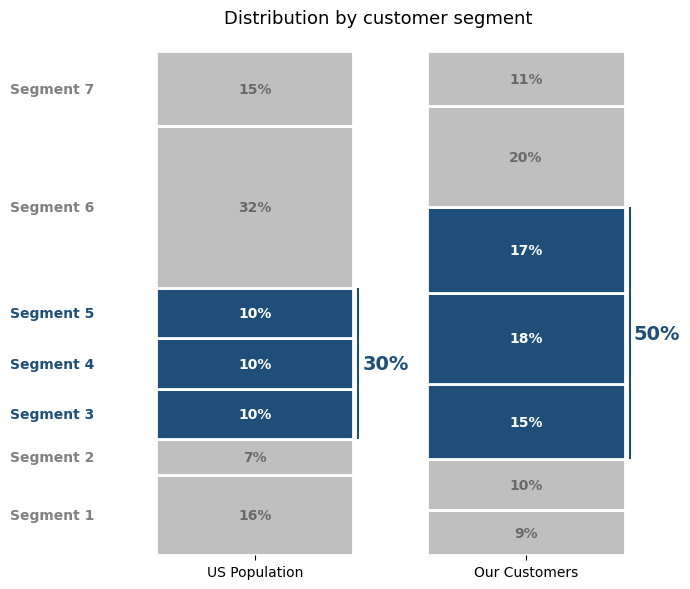

In [74]:
import matplotlib.pyplot as plt

# Segment data
segments = ['Segment 1', 'Segment 2', 'Segment 3', 'Segment 4', 'Segment 5', 'Segment 6', 'Segment 7']
us_population = [16, 7, 10, 10, 10, 32, 15]
our_customers = [9, 10, 15, 18, 17, 20, 11]

# Segment colors
highlight_segments = [2, 3, 4] 
colors_us = ['#bfbfbf' if i not in highlight_segments else '#1f4e79' for i in range(len(segments))]
colors_customers = ['#bfbfbf' if i not in highlight_segments else '#1f4e79' for i in range(len(segments))]

# Plot
fig, ax = plt.subplots(figsize=(7, 6))

positions = [0, 1.1]
labels = ['US Population', 'Our Customers']
data = [us_population, our_customers]
colors = [colors_us, colors_customers]

# Plot stacked bars
for i in range(2): 
    bottom = 0
    for j in range(len(segments)):
        height = data[i][j]
        color = colors[i][j]
        ax.bar(positions[i], height, bottom=bottom, color=color, edgecolor='white', linewidth=2)
        text_color = 'white' if color != '#bfbfbf' else 'dimgray'
        ax.text(positions[i], bottom + height/2, f'{height}%', ha='center', va='center',
                color=text_color, fontweight='bold', fontsize=10)
        bottom += height

# Add bold 30% and 50% text on the side of segments 3–5
us_midpoint = sum(us_population[:2]) + sum(us_population[2:5]) / 2
cust_midpoint = sum(our_customers[:2]) + sum(our_customers[2:5]) / 2

ax.text(0.53, us_midpoint, '30%', ha='center', va='center', fontsize=14, fontweight='bold', color='#1f4e79')
ax.text(1.63, cust_midpoint, '50%', ha='center', va='center', fontsize=14, fontweight='bold', color='#1f4e79')

# Borders and labels cleanup
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.set_xlim(-0.6, 1.6)
ax.set_ylim(0, 100)
ax.set_title('Distribution by customer segment', fontsize=13, pad=20, loc='center')
ax.set_yticks([]) 
ax.set_ylabel('')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add segment labels 
bottom = 0
for i in range(len(segments)):
    height = us_population[i]
    y = bottom + height / 2
    label_color = '#1f4e79' if i in highlight_segments else 'gray'
    ax.text(-0.65, y, segments[i], va='center', ha='right',
            fontsize=10, color=label_color, fontweight='bold')
    bottom += height

# Vertical lines next to 30% and 50%
us_bottom = sum(us_population[:2])  # start of Segment 3
us_top = us_bottom + sum(us_population[2:5])  # end of Segment 5

cust_bottom = sum(our_customers[:2])
cust_top = cust_bottom + sum(our_customers[2:5])

# Left vertical line
ax.vlines(x=0.42, ymin=us_bottom, ymax=us_top, color='#1f4e79', linewidth=1.5)

# Right vertical line
ax.vlines(x=1.52, ymin=cust_bottom, ymax=cust_top, color='#1f4e79', linewidth=1.5)

plt.tight_layout()
plt.show()